In [53]:
import pandas as pd
import numpy as np
pd.__version__

u'0.20.3'

## Series

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

In [12]:
data = pd.Series([0.25,0.5, 0.75, 1.0], index= [2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [20]:
population_dic = {'California': 38332421,
                 'Texas': 26448193,
                 'New York': 19651127,
                 'Florida': 19552860,
                 'Illinois': 12882135}
population = pd.Series(population_dic)
population

California    38332421
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [15]:
population['California']

38332421

In [16]:
population['California':'Illinois']

California    38332421
Florida       19552860
Illinois      12882135
dtype: int64

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'})

1    b
2    a
3    c
dtype: object

In [18]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3,2])

3    c
2    a
dtype: object

## DataFrame

In [22]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 190312, 'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population, 'area':area})
states

,area,population
California,423967,38332421
Florida,190312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [23]:
states.index

Index([u'California', u'Florida', u'Illinois', u'New York', u'Texas'], dtype='object')

In [24]:
states.columns

Index([u'area', u'population'], dtype='object')

In [27]:
states['area']['California']

423967

In [29]:
pd.DataFrame(population, columns = ['popu'])

,popu
California,38332421
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [31]:
data = [{'a': i, 'b':2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [32]:
pd.DataFrame([{'a': 1, 'b':2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [37]:
pd.DataFrame(np.random.rand(3,2),
             columns=['foo','bar'], 
             index = ['a','b','c'])

,foo,bar
a,0.238225,0.596594
b,0.518994,0.775387
c,0.634274,0.969924


In [40]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B','f8')])
A

array([(0,  0.), (0,  0.), (0,  0.)],
      dtype=[('A', '<i8'), ('B', '<f8')])

In [41]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Index

In [43]:
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [44]:
ind[1]

3

In [45]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [46]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

(5, (5,), 1, dtype('int64'))


In [48]:
ind[1] =0

TypeError: Index does not support mutable operations

In [49]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7 ,11])
indA & indB

Int64Index([3, 5, 7], dtype='int64')

In [50]:
indA | indB

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [51]:
indA ^ indB

Int64Index([1, 2, 9, 11], dtype='int64')

# 資料的索引和選擇

## Series

In [53]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [54]:
data['b']

0.5

In [55]:
'a' in data

True

In [56]:
data.keys()

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [63]:
list(data.iteritems())

# pandas version 0.18.1
# list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [65]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [66]:
data['a':'c'] # index a - c

a    0.25
b    0.50
c    0.75
dtype: float64

In [67]:
data[0:2] # index 0 - 1

a    0.25
b    0.50
dtype: float64

In [68]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [69]:
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [70]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [71]:
data[1]

'a'

In [72]:
data[1:3] # 用隱含的索引

3    b
5    c
dtype: object

In [73]:
data.loc[1]

'a'

In [74]:
data.loc[1:3] # 使用明確的索引

1    a
3    b
dtype: object

In [75]:
data.iloc[1] # 用隱含的索引

'b'

In [76]:
data.iloc[1:3] # 用隱含的索引

3    b
5    c
dtype: object

## DataFrame

In [78]:
area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312,
                 'Illinois': 149995})
pop = pd.Series({'California': 38332521,'Texas': 2644893, 'New York':19651127,
                'Florida': 19552860, 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,2644893


In [79]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [80]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [81]:
data.area is data['area']

True

In [82]:
data.pop is data['pop'] # DataFrame has pop method

False

In [83]:
data.pop

<bound method DataFrame.pop of               area       pop
California  423967  38332521
Florida     170312  19552860
Illinois    149995  12882135
New York    141297  19651127
Texas       695662   2644893>

In [84]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,2644893,3.801980


In [85]:
data.values

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528600e+07,   1.14806121e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01],
       [  1.41297000e+05,   1.96511270e+07,   1.39076746e+02],
       [  6.95662000e+05,   2.64489300e+06,   3.80197998e+00]])

In [86]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644893e+06
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801980e+00


In [88]:
data.values[0]

array([  4.23967000e+05,   3.83325210e+07,   9.04139261e+01])

In [89]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [90]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [93]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [100]:
data.ix[:3, :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [101]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [103]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,2644893,3.801980


In [104]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [105]:
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [106]:
data[data.density > 100]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


## Pandas UFuncs(Universal Functions)

In [110]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [111]:
df = pd.DataFrame(rng.randint(0, 10, (3,4)),
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [112]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [113]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [114]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 
                 'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                       'New York': 19651127}, name='population')

In [115]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [116]:
area.index | population.index

Index([u'Alaska', u'California', u'New York', u'Texas'], dtype='object')

In [117]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [119]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [120]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                columns = list('AB'))
A

,A,B
0,1,11
1,5,1


In [122]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [123]:
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [125]:
fill = A.stack().mean()
A.add(B, fill_value=0)

,A,B,C
0,1.0,15.0,9.0
1,13.0,6.0,0.0
2,2.0,9.0,6.0


In [126]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [128]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [134]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [135]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [136]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [137]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [138]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


In [139]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


## 處理缺失資料

In [140]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [141]:
for dtype in ['object', 'int']:
    print("dtype = ", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

('dtype = ', 'object')
10 loops, best of 3: 41.3 ms per loop
()
('dtype = ', 'int')
100 loops, best of 3: 3.48 ms per loop
()


In [142]:
vals1.sum() 

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [143]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [144]:
1 + np.nan

nan

In [145]:
0 * np.nan

nan

In [146]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [147]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [148]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [149]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [151]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [152]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [153]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [154]:
data[data.isnull()]

1     NaN
3    None
dtype: object

In [155]:
data.dropna()

0        1
2    hello
dtype: object

In [156]:
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [157]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [158]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [160]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [162]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [163]:
df.dropna(axis= 'columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [164]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [182]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [183]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [184]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [185]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [186]:
df.fillna(method='ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# 階層式索引 (Hierarchical Indexing)

In [187]:
# Bad
index = [('California', 2000), ('California', 2010),
        ('New York', 2000), ('New York', 2010),
        ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37254956,
              18976457, 19378102,
              20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37254956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [188]:
# Bad
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37254956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

## Pandas MultiIndex

In [189]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[[u'California', u'New York', u'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [191]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37254956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [192]:
pop[:, 2010]

California    37254956
New York      19378102
Texas         25145561
dtype: int64

In [193]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37254956
New York,18976457,19378102
Texas,20851820,25145561


In [194]:
pop_df.stack()

California  2000    33871648
            2010    37254956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [195]:
pop_df = pd.DataFrame({'total':pop, 'under18':[9267089, 9284094,
                                              4687374, 4318033,
                                              5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37254956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [196]:
pop_df.unstack()

total            under18         
                2000      2010     2000     2010
California  33871648  37254956  9267089  9284094
New York    18976457  19378102  4687374  4318033
Texas       20851820  25145561  5906301  6879014

In [197]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249204
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Create MultiIndex

In [198]:
df = pd.DataFrame(np.random.rand(4, 2),
                 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                 columns=['data1', 'data2'])
df

data1     data2
a 1  0.746668  0.176566
  2  0.627948  0.066533
b 1  0.411914  0.693715
  2  0.634157  0.744772

In [199]:
data = {('California', 2000): 33871648,
       ('California', 2010): 37253956,
       ('Texas', 2000): 20851820,
       ('Texas', 2010): 25145561,
       ('New York', 2000): 18976457,
       ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [200]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [201]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [202]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [203]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
             labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [204]:
pop

California  2000    33871648
            2010    37254956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [209]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37254956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [210]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                  names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                    names=['subject', 'type'])
index, columns

(MultiIndex(levels=[[2013, 2014], [1, 2]],
            labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
            names=[u'year', u'visit']),
 MultiIndex(levels=[[u'Bob', u'Guido', u'Sue'], [u'HR', u'Temp']],
            labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
            names=[u'subject', u'type']))

In [211]:
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
data

array([[ 32. ,  38.6,  52. ,  37.1,  48. ,  37.4],
       [ 32. ,  38. ,  45. ,  36.2,  35. ,  36. ],
       [ 40. ,  37.5,  28. ,  37.4,  30. ,  39.9],
       [ 40. ,  36.1,  34. ,  36.5,  48. ,  38.8]])

In [212]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      32.0  38.6  52.0  37.1  48.0  37.4
     2      32.0  38.0  45.0  36.2  35.0  36.0
2014 1      40.0  37.5  28.0  37.4  30.0  39.9
     2      40.0  36.1  34.0  36.5  48.0  38.8

In [213]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      52.0  37.1
     2      45.0  36.2
2014 1      28.0  37.4
     2      34.0  36.5

In [215]:
pop

state       year
California  2000    33871648
            2010    37254956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [216]:
pop['California', 2000]

33871648

In [217]:
pop['California']

year
2000    33871648
2010    37254956
dtype: int64

In [218]:
pop.loc['California': 'New York']

state       year
California  2000    33871648
            2010    37254956
New York    2000    18976457
            2010    19378102
dtype: int64

In [219]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [220]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37254956
Texas       2010    25145561
dtype: int64

In [221]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37254956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [222]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      32.0  38.6  52.0  37.1  48.0  37.4
     2      32.0  38.0  45.0  36.2  35.0  36.0
2014 1      40.0  37.5  28.0  37.4  30.0  39.9
     2      40.0  36.1  34.0  36.5  48.0  38.8

In [223]:
health_data['Guido', 'HR']

year  visit
2013  1        52.0
      2        45.0
2014  1        28.0
      2        34.0
Name: (Guido, HR), dtype: float64

In [224]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      32.0  38.6
     2      32.0  38.0

In [225]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        32.0
      2        32.0
2014  1        40.0
      2        40.0
Name: (Bob, HR), dtype: float64

In [226]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-226-8e3cc151e316>, line 1)

In [227]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,32.0,52.0,48.0
2014,1,40.0,28.0,30.0


## 重排列多重索引

In [228]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1,2]]) # index未排序
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int'] 
data

char  int
a     1      0.218604
      2      0.562704
c     1      0.446147
      2      0.091137
b     1      0.682050
      2      0.407751
dtype: float64

In [229]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [230]:
data = data.sort_index()
data

char  int
a     1      0.218604
      2      0.562704
b     1      0.682050
      2      0.407751
c     1      0.446147
      2      0.091137
dtype: float64

In [232]:
pop

state       year
California  2000    33871648
            2010    37254956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [233]:
pop.unstack(level = 0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37254956,19378102,25145561


In [234]:
pop.unstack(level = 1)

year,2000,2010
state,,
California,33871648,37254956
New York,18976457,19378102
Texas,20851820,25145561


In [236]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37254956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [237]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37254956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [238]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      32.0  38.6  52.0  37.1  48.0  37.4
     2      32.0  38.0  45.0  36.2  35.0  36.0
2014 1      40.0  37.5  28.0  37.4  30.0  39.9
     2      40.0  36.1  34.0  36.5  48.0  38.8

In [239]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     32.0  38.3  48.5  36.65  41.5  36.70
2014     40.0  36.8  31.0  36.95  39.0  39.35

In [240]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,40.666667,37.216667
2014,36.666667,37.700000


## 資料集的合併

In [241]:
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [242]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [243]:
x = [[1, 2],
    [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [244]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [246]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [253]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [254]:
x = make_df('AB', [0,1])
y = make_df('AB', [2,3])
y.index = x.index
print(x); print(y); print(pd.concat([x,y]));

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [255]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

('ValueError:', ValueError('Indexes have overlapping values: [0, 1]',))


In [256]:
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [258]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [259]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [260]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [261]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [262]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


## merge

In [263]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'group':['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                   'hire_date':[2004, 2008, 2012, 2014]})
print(df1); print(df2);

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [265]:
df3 = pd.merge(df1, df2) # one to one
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [266]:
df4 = pd.DataFrame({'group':['Accounting', 'Engineering', 'HR'],
                   'supervisor':['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4)) # many to one

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [267]:
df5 = pd.DataFrame({'group':['Accounting', 'Accounting', 'Engineering', 'Engineering',
                            'HR', 'HR'],
                   'skills':['math', 'spreadsheets', 'coding', 'linux',
                            'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [268]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [269]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [272]:
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000


In [273]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a);

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [274]:
print(df1a); print(df2a); print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


### join

In [275]:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [276]:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [277]:
df6 = pd.DataFrame({'name':['Peter', 'Paul', 'Mary'],
                   'food':['fish', 'beans', 'bread']},
                  columns=['name', 'food'])
df7 = pd.DataFrame({'name':['Mary', 'Joseph'],
                   'drink':['wine', 'beer']},
                  columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [278]:
pd.merge(df6, df7, how='inner') # inner join

,name,food,drink
0,Mary,bread,wine


In [279]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer')) # outer join

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [280]:
print(df6); print(df7); print(pd.merge(df6, df7, how='left')) # left join

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [281]:
print(df6); print(df7); print(pd.merge(df6, df7, how='right')) # right join

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


In [283]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [284]:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


## 範例：美國聯邦州的資料

In [287]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [288]:
print(pop.head()); print(areas.head()); print(abbrevs.head());

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [294]:
merged = pd.merge(pop, abbrevs, how='outer',
                 left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [295]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [296]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [297]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [299]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United states'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [300]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [301]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [316]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array([], dtype=object)

In [317]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [318]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [319]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [321]:
density.sort_values(ascending=False, inplace=True)
density.head()

389     8898.897059
2490    1058.665149
1445    1009.253268
1914     681.339159
293      645.600649
dtype: float64

In [322]:
density.tail()

2010    10.583512
1637     9.537565
1253     6.736171
2405     5.768079
91       1.087509
dtype: float64

## 聚合計算與分組

In [323]:
import seaborn as sns

In [324]:
planets = sns.load_dataset('planets') # 行星資料
planets.shape

(1035, 6)

In [325]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [326]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [328]:
ser.sum()

2.811925491708157

In [329]:
ser.mean()

0.5623850983416314

In [330]:
df = pd.DataFrame({'A': rng.rand(5),
                  'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [331]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [332]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [333]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy：Split、Apply、Combine

In [334]:
df = pd.DataFrame({'key':['A', 'B', 'C', 'A', 'B', 'C'],
                  'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [335]:
df.groupby('key')

In [336]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [337]:
planets.groupby('method')

In [338]:
planets.groupby('method')['orbital_period']

In [339]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [340]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [341]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [342]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                 columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [347]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [348]:
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [351]:
def filter_func(x):
    return x['data2'].std() > 4

In [352]:
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [355]:
print(df.groupby('key').mean())
df.groupby('key').transform(lambda x: x - x.mean())

     data1  data2
key              
A      1.5    4.0
B      2.5    3.5
C      3.5    6.0


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


## apply()

In [356]:
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x

In [357]:
print(df); print(df.groupby('key').apply(norm_by_data2));

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [358]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [359]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [360]:
df2 = df.set_index('key')
mapping = {'A': 'vower', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vower          3      8


In [361]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [362]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vower,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [363]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## 樞紐分析表 (Pivot Table)

In [364]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [365]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [366]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [367]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [368]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [369]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308  

In [370]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [372]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## 範例：出生率資料

In [374]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [375]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


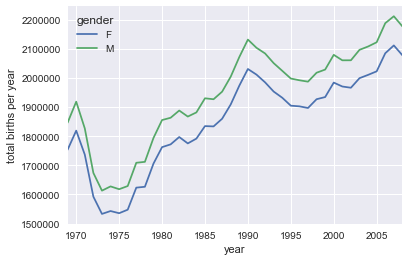

In [376]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [377]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.75 * (quartiles[2] - quartiles[0])

In [381]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [383]:
births['day'] = births['day'].astype(int)

In [384]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

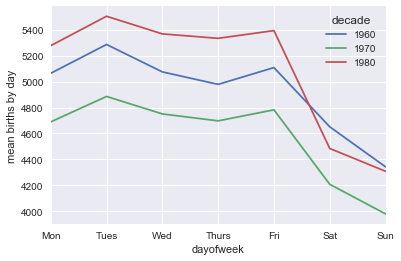

In [385]:
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [389]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [388]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [390]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


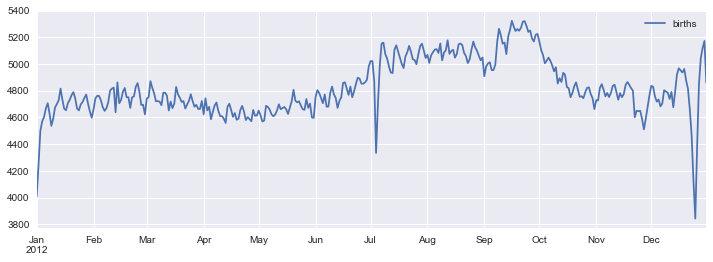

In [397]:
fix, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

## 向量化字串操作

In [398]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [400]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [401]:
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [403]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [404]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                  'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [405]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [406]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [407]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [408]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [410]:
monte.str.extract('([A-Za-z]+)')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [411]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [422]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [416]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [419]:
full_monte = pd.DataFrame({'name': monte,
                          'info':['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [421]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## 範例：食譜資料庫

In [423]:
!ls data

BicycleWeather.csv    california_cities.csv state-areas.csv
Seattle2014.csv       president_heights.csv state-population.csv
births.csv            state-abbrevs.csv


In [424]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
!gunzip recipeitems-latest.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    20  100    20    0     0     20      0  0:00:01 --:--:--  0:00:01    23


In [432]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

('ValueError:', ValueError('Trailing data',))


In [433]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [434]:
with open('recipeitems-latest.json', 'r') as f:
    data = (line.strip() for line in f)
    data_json = "[{0}]".format(','.join(data))
recipes = pd.read_json(data_json)

In [435]:
recipes.shape

(173278, 17)

In [436]:
recipes.iloc[0]

_id                              {u'$oid': u'5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

In [437]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [438]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

u'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [439]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [440]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [441]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

In [442]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
             'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [443]:
import re
spice_df = pd.DataFrame(
    dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                            for spice in spice_list))
spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [444]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [445]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

## Time Series

In [446]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [447]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [449]:
date.strftime('%A')

'Saturday'

In [450]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [451]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

In [452]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [453]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [455]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [456]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [457]:
date.strftime('%A')

'Saturday'

In [458]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [459]:
date + pd.to_timedelta(np.arange(12), 'M')

DatetimeIndex(['2015-07-04 00:00:00', '2015-08-03 10:29:06',
               '2015-09-02 20:58:12', '2015-10-03 07:27:18',
               '2015-11-02 17:56:24', '2015-12-03 04:25:30',
               '2016-01-02 14:54:36', '2016-02-02 01:23:42',
               '2016-03-03 11:52:48', '2016-04-02 22:21:54',
               '2016-05-03 08:51:00', '2016-06-02 19:20:06'],
              dtype='datetime64[ns]', freq=None)

In [461]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [462]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [463]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [464]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of july, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [465]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [466]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [468]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [469]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [470]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [471]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [472]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## 頻率和位移值
D 日曆天
B 工作天

W 週

M 月結束點
BM 工作月結束點

Q 季結束點
BQ 工作季結束點

A 年結束點
BA 工作年結束點

H 小時
BH 工作小時

T 分

S 秒

L 毫秒

U 微秒

N 奈秒


In [473]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [474]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [51]:
# conda install -c https://conda.anaconda.org/anaconda pandas-datareader
from pandas_datareader import data
goog = data.DataReader('GOOG', 'iex', start='2014-01-01', end='2019-01-01')
goog.head()

,open,high,low,close,volume
date,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052
2014-03-28,561.200,566.43,558.67,559.99,41003
2014-03-31,566.890,567.00,556.93,556.97,10772
2014-04-01,558.710,568.45,558.71,567.16,7932
2014-04-02,565.106,604.83,562.19,567.00,146697


In [52]:
goog = goog['close']
goog.head()

date
2014-03-27    558.46
2014-03-28    559.99
2014-03-31    556.97
2014-04-01    567.16
2014-04-02    567.00
Name: close, dtype: float64

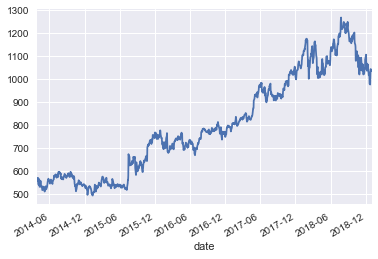

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
# TypeError: Only valid with DatetimeIndex or PeriodIndex
goog.index = pd.to_datetime(goog.index)
goog.plot()

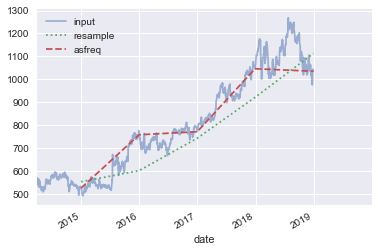

In [57]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

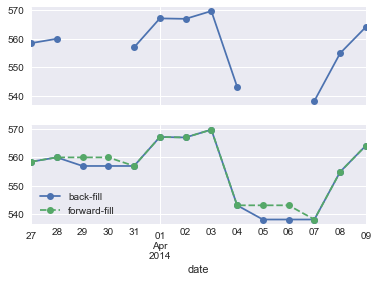

In [58]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

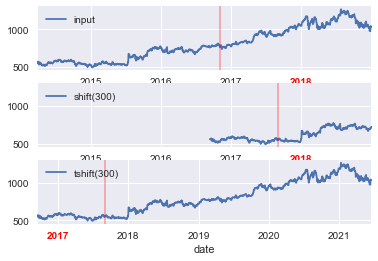

In [64]:
fig, ax = plt.subplots(3, sharey=True)

goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2016-11-05')
offset = pd.Timedelta(300, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(300)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(300)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

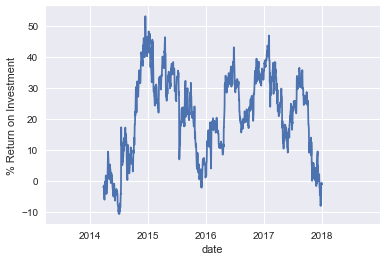

In [65]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

In [71]:
goog.head()

date
2014-03-27    558.46
2014-03-28    559.99
2014-03-29    559.99
2014-03-30    559.99
2014-03-31    556.97
Freq: D, Name: close, dtype: float64

In [73]:
goog.shift(-1).head()

date
2014-03-27    559.99
2014-03-28    559.99
2014-03-29    559.99
2014-03-30    556.97
2014-03-31    567.16
Freq: D, Name: close, dtype: float64

In [74]:
goog.tshift(1).head()

date
2014-03-28    558.46
2014-03-29    559.99
2014-03-30    559.99
2014-03-31    559.99
2014-04-01    556.97
Freq: D, Name: close, dtype: float64

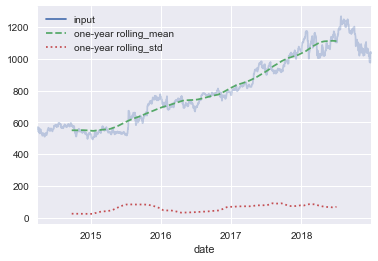

In [75]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## 範例：視覺化西雅圖自行車數量

In [77]:
!curl -o Fremontbridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1536k    0 1536k    0     0   307k      0 --:--:--  0:00:05 --:--:--  378k


In [78]:
data = pd.read_csv('Fremontbridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2018-12-31 23:00:00,7.0,6.0
2018-12-31 22:00:00,3.0,4.0
2018-12-31 21:00:00,7.0,7.0
2018-12-31 20:00:00,12.0,14.0
2018-12-31 19:00:00,9.0,5.0


In [79]:
data.columns = ['East', 'West']
data['Total'] = data.eval('West + East')

In [80]:
data.head()

,East,West,Total
Date,,,
2018-12-31 23:00:00,7.0,6.0,13.0
2018-12-31 22:00:00,3.0,4.0,7.0
2018-12-31 21:00:00,7.0,7.0,14.0
2018-12-31 20:00:00,12.0,14.0,26.0
2018-12-31 19:00:00,9.0,5.0,14.0


In [84]:
data.dropna().describe()

In [85]:
%matplotlib inline
import seaborn; seaborn.set()

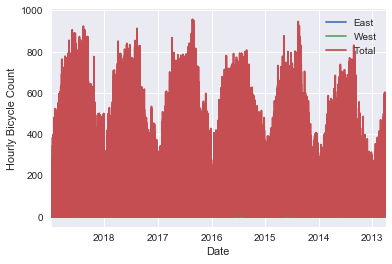

In [86]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

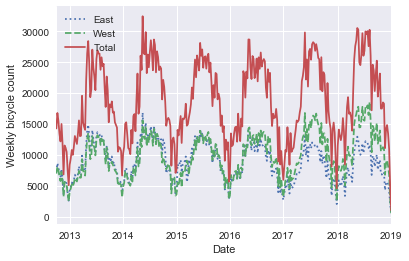

In [88]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

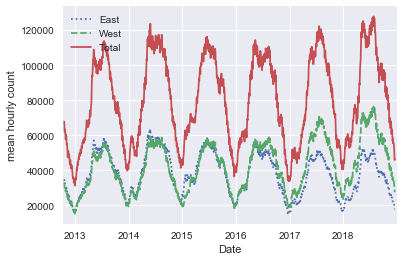

In [89]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

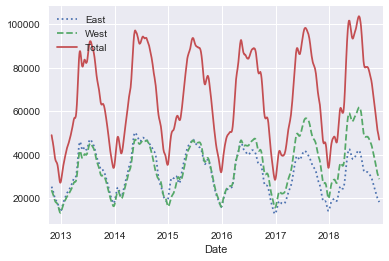

In [90]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

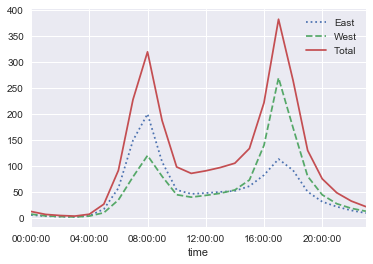

In [91]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

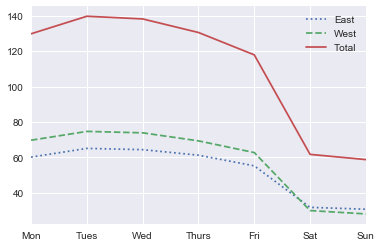

In [93]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [96]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

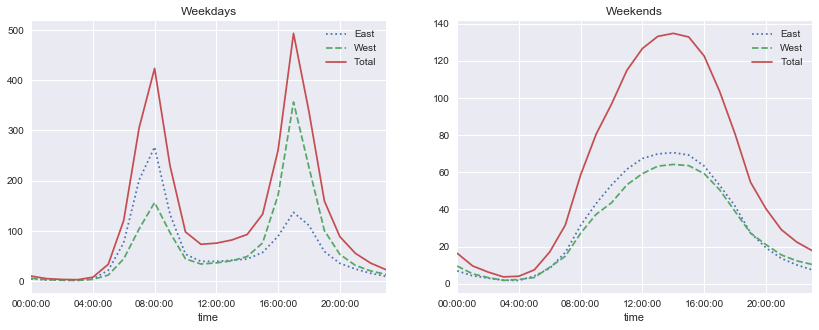

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])

## 高效率Pandas：eval()以及query()

In [104]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.randint(1E6)
y = rng.randint(1E6)
%timeit x + y

The slowest run took 19.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 148 ns per loop


In [ ]:
# pyton 2.X zip() TypeError zip argument #1 must support iteration
# use itertools
import itertools